# Topic Modeling Assessment Project

---



In this Topic Modeling Assessment, a dataset of over 400,000 quora questions will be labeled that have no labeled cateogry, and attempted to find 20 cateogries to assign these questions to. 

#### Task: Import pandas and read in the quora_questions.csv file.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/quora_questions.csv')

In [ ]:
df.head(10)

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
5,Astrology: I am a Capricorn Sun Cap moon and c...
6,Should I buy tiago?
7,How can I be a good geologist?
8,When do you use シ instead of し?
9,Motorola (company): Can I hack my Charter Moto...


#Finding out top 20 topics

In [ ]:
!pip install top2vec[sentence_encoders]

from top2vec import Top2Vec
docs = df['Question'].tolist()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 44.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541519 sha256=d20612212f22c39200506cb3c9d6810716de3d259106f81c496b5c534826c213
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=

In [ ]:
model = Top2Vec(docs,
    embedding_model="universal-sentence-encoder",
    speed="fast-learn",
    workers=20)

2023-05-02 20:47:32,639 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-05-02 20:47:51,778 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-05-02 20:48:10,718 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-02 20:49:43,167 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-02 21:39:29,122 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-02 21:40:29,615 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

4544

#### TASK: Print out the most common words for each of the 20 topics.

In [ ]:
reduced_topics = model.hierarchical_topic_reduction(num_topics=20)


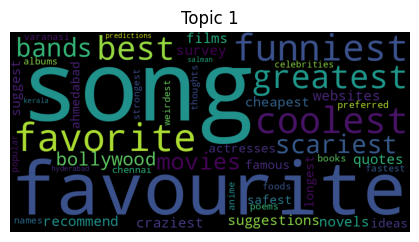

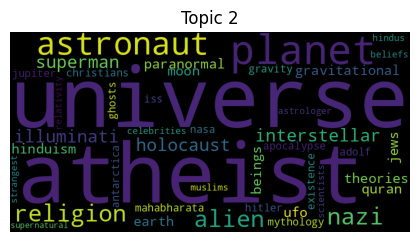

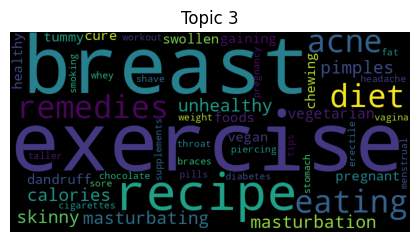

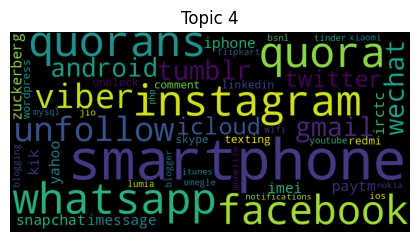

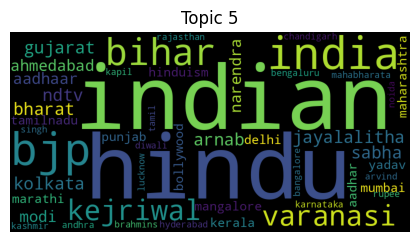

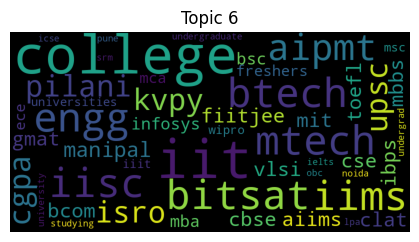

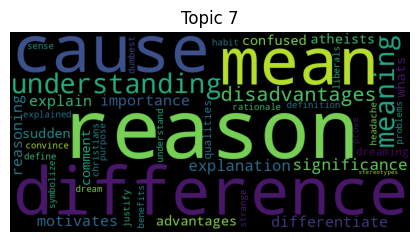

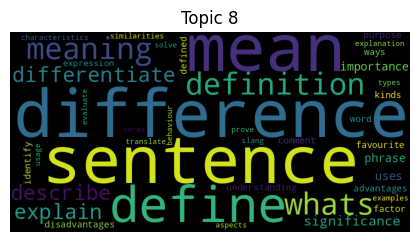

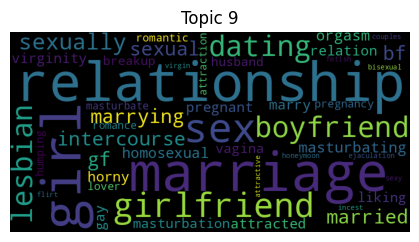

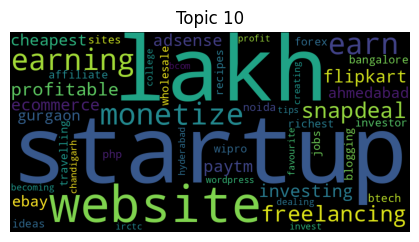

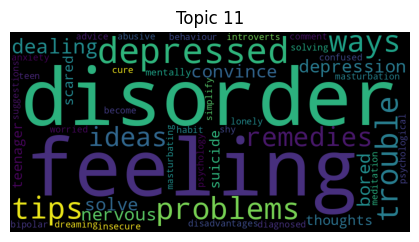

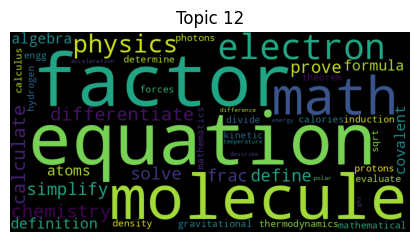

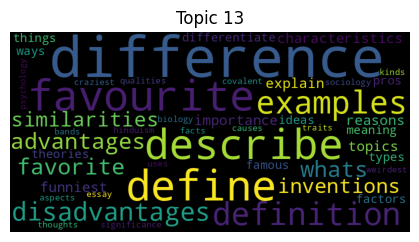

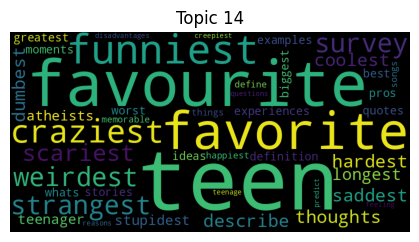

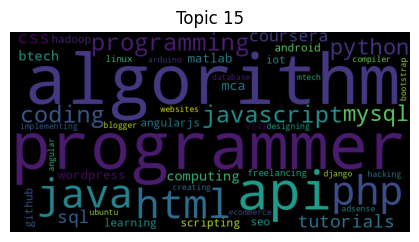

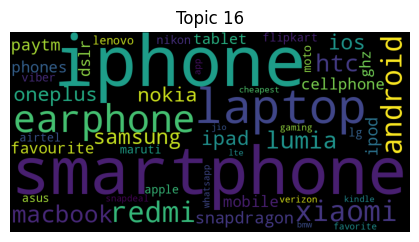

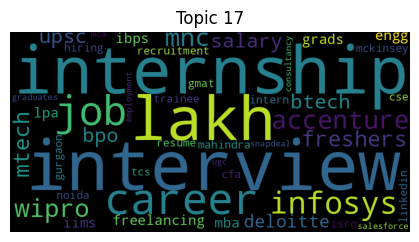

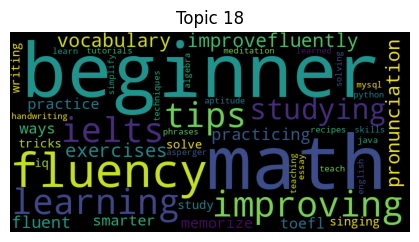

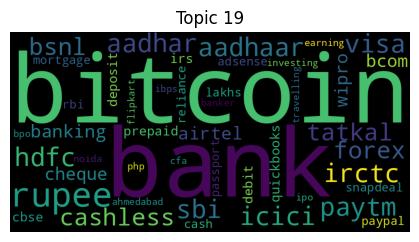

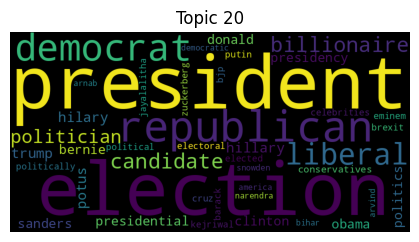

In [ ]:
Topic_Words_Update =model.topic_words_reduced

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for each topic
for i, topic_words in enumerate(Topic_Words_Update):
    wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='black', 
                min_font_size = 10).generate_from_text(' '.join(topic_words))
    # Plot the word cloud for the topic
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Topic {i+1}")
    plt.show()

In [ ]:
# Manually name the topic labels by fine tuning

topic_labels = list(enumerate([
    "Topic1", "Topic2", "Topic3", "Topic4",
    "Topic5", "Topic6", "Topic7", "Topic8",
    "Topic9", "Topic10", "Topic11", "Topic12", "Topic13",
    "Topic14", "Topic15 ", "Topic16", "Topic17",
    "Topic18", "Topic19", "Topic20",]))

df_top = pd.DataFrame(topic_labels, columns=["topic_id", "topic_name"])

hierarchy=model.get_topic_hierarchy()

hierarchy_labels = list(enumerate(hierarchy))

hierarchy_labels_df = pd.DataFrame(hierarchy_labels, columns=["topic_id", "underlying_topics"])

df_topics = df_top.merge(hierarchy_labels_df, on="topic_id", how="left")

df_topics.head(20)


#### TASK: Add  new columns to the original quora dataframe that labels each question into one of the 20 topic categories.

In [ ]:
segments = df['Question']

In [ ]:
# segment is an article
# the segments were enumerated to allow joining with the topics data frame
segment_topic_ids = [
    model.get_documents_topics(doc_ids=[i,])[0][0]
    for i,_ in enumerate(segments)]

In [ ]:
df['Topic_ID'] = segment_topic_ids


In [ ]:
emp=[]

for i in range(404289):
  for j in range(20):
    if df['Topic_ID'][i] in df_topics['underlying_topics'][j]:
      emp.append(df_topics['topic_name'][j])

In [ ]:
df.drop('Topic_Name',axis=1)

In [ ]:
df.to_csv('Labeled_Quora_Questions.csv',index=False)